<a href="https://colab.research.google.com/github/padhisagar/Data_Science_Learning/blob/main/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sms
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_csv('airline_passengers.csv')

In [9]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    145 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [11]:
df.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [12]:
df.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [13]:
df.dropna(axis=0,inplace=True)

In [14]:
df.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [15]:
df['Month'] = pd.to_datetime(df['Month'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [17]:
df.shape

(144, 2)

In [18]:
df

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0
...,...,...
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0


In [19]:
df =df.set_index('Month',drop=True)

In [20]:
df

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


<Axes: xlabel='Month'>

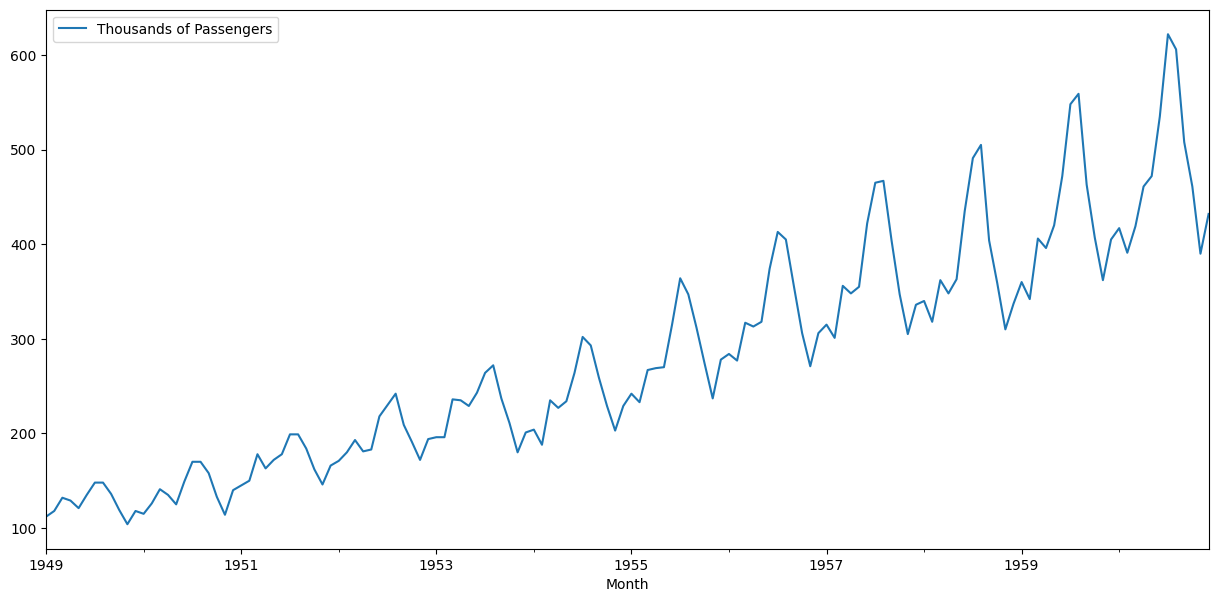

In [21]:
df.plot(figsize=(15,7))

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
def adf_test(series):
  result=adfuller(series)
  print('ADF Statics:  {}'.format(result[0]))
  print('P-Values: {}'.format(result[1]))
  if result[1] <= 0.05:
    print("Its is stationary")
  else:
    print("Its is not stationary")

In [24]:
adf_test(df['Thousands of Passengers'])

ADF Statics:  0.8153688792060498
P-Values: 0.991880243437641
Its is not stationary


In [25]:
df['First_Difference'] = df['Thousands of Passengers'] - df['Thousands of Passengers'].shift(1)

In [26]:
df

,Thousands of Passengers,First_Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0
...,...,...
1960-08-01,606.0,-16.0
1960-09-01,508.0,-98.0
1960-10-01,461.0,-47.0


In [27]:
adf_test(df['First_Difference'].dropna(axis=0))

ADF Statics:  -2.8292668241700047
P-Values: 0.05421329028382478
Its is not stationary


In [28]:
df['Second_Difference'] = df['First_Difference']-df['First_Difference'].shift(1)

In [29]:
df

,Thousands of Passengers,First_Difference,Second_Difference
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0
...,...,...,...
1960-08-01,606.0,-16.0,-103.0
1960-09-01,508.0,-98.0,-82.0
1960-10-01,461.0,-47.0,51.0


In [30]:
adf_test(df['Second_Difference'].dropna())

ADF Statics:  -16.384231542468513
P-Values: 2.7328918500142026e-29
Its is stationary


<Axes: xlabel='Month'>

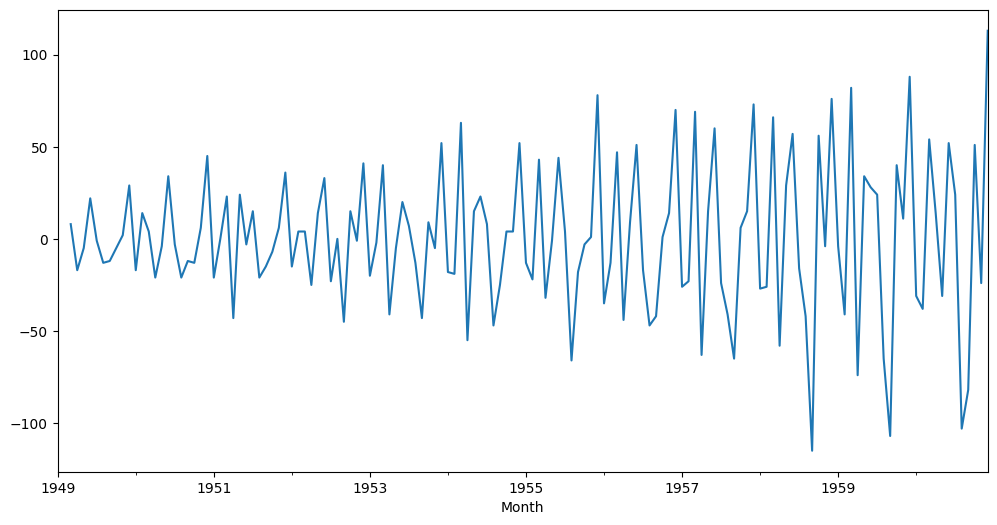

In [32]:
df['Second_Difference'].plot(figsize=(12,6))

In [34]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

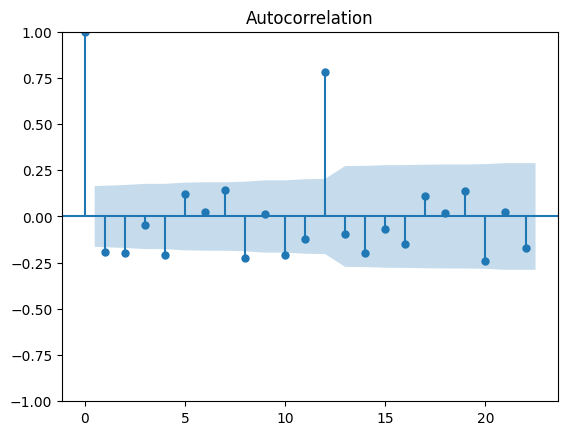

In [35]:
acf = plot_acf(df['Second_Difference'].dropna())

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


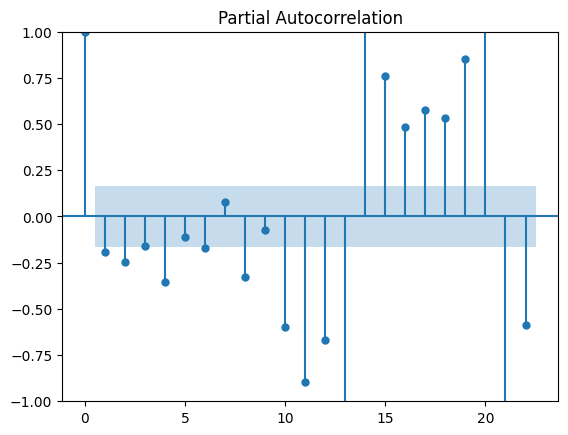

In [36]:
pacf = plot_pacf(df['Second_Difference'].dropna())

In [38]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 30.2 MB/s eta 0:00:00


In [39]:
from pmdarima import auto_arima

In [40]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [42]:
train_data=df[:train_dataset_end]
test_data=df[train_dataset_end+timedelta(days=1):test_dataset_end]


In [43]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [44]:
test_data

,Thousands of Passengers,First_Difference,Second_Difference
Month,,,
1956-01-01,284.0,6.0,-35.0
1956-02-01,277.0,-7.0,-13.0
1956-03-01,317.0,40.0,47.0
1956-04-01,313.0,-4.0,-44.0
1956-05-01,318.0,5.0,9.0
1956-06-01,374.0,56.0,51.0
1956-07-01,413.0,39.0,-17.0
1956-08-01,405.0,-8.0,-47.0
1956-09-01,355.0,-50.0,-42.0


In [48]:
from statsmodels.tsa.arima_model import ARIMA

In [49]:
train_data

,Thousands of Passengers,First_Difference,Second_Difference
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0
...,...,...,...
1955-08-01,347.0,-17.0,-66.0
1955-09-01,312.0,-35.0,-18.0
1955-10-01,274.0,-38.0,-3.0


In [51]:
from statsmodels.tsa.arima.model import ARIMA

In [67]:
model = ARIMA(train_data['Thousands of Passengers'],order=(10,2,12))

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [68]:
results = model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [69]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                    ARIMA(10, 2, 12)   Log Likelihood                -307.735
Date:                     Fri, 21 Apr 2023   AIC                            661.469
Time:                             13:11:40   BIC                            716.824
Sample:                         01-01-1949   HQIC                           683.693
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0468      0.115      0.408      0.683      -0.178       0.271
ar.L2         -1.0429      0.084    -12.479      0.000      -1.207      -0.879
ar.L3          0.0886      0.139      0.638      0.523      -0.183       0.361
ar.L4         -1.0259      0.131     -7.825      0.000      -1.283      -0.769
ar.L5          0.0658      0.155      0.423      0.672      -0.239       0.370
ar.L6         -0.9861      0.143     -6.882      0.000      -1.267      -0.705
ar.L7          0.0175      0.142      0.123      0.902      -0.261       0.296
ar.L8         -0.9822      0.122     -8.030      0.000      -1.222      -0.742
ar.L9         -0.0069      0.095     -0.073      0.942      -0.193       0.179
ar.L10        -0.9389      0.085    -11.096      0.000      -1.105      -0.773
ma.L1         -1.2855      0.254     -5.057      0.000      -1.784      -0.787
ma.L2          1.2393      0.359      3.455      0.001       0.536       1.942
ma.L3         -1.4415      0.437     -3.302      0.001      -2.297      -0.586
ma.L4          1.3761      0.507      2.713      0.007       0.382       2.370
ma.L5         -1.2166      0.575     -2.116      0.034      -2.344      -0.090
ma.L6          1.0831      0.660      1.640      0.101      -0.211       2.378
ma.L7         -1.0701      0.715     -1.497      0.134      -2.471       0.331
ma.L8          0.8861      0.819      1.082      0.279      -0.719       2.491
ma.L9         -0.7852      0.737     -1.066      0.287      -2.229       0.659
ma.L10         0.5230      0.601      0.870      0.384      -0.656       1.702
ma.L11        -0.4130      0.455     -0.908      0.364      -1.305       0.479
ma.L12         0.1336      0.273      0.489      0.625      -0.402       0.669
sigma2        77.2663     16.217      4.764      0.000      45.481     109.051
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.74
Prob(Q):                              0.99   Prob(JB):                         0.09
Heteroskedasticity (H):               2.12   Skew:                             0.59
Prob(H) (two-sided):                  0.06   Kurtosis:                         2.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [80]:
from sklearn.metrics import mean_absolute_percentage_error

In [70]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [82]:
pred=results.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred


In [72]:
residuals

Month
1956-01-01      0.755907
1956-02-01      7.483366
1956-03-01     21.814335
1956-04-01     14.409535
1956-05-01     18.898844
1956-06-01     28.643513
1956-07-01     24.517730
1956-08-01     33.110557
1956-09-01     14.908693
1956-10-01      3.101660
1956-11-01     -0.800719
1956-12-01      3.374272
1957-01-01      3.923324
1957-02-01      7.196091
1957-03-01     39.036242
1957-04-01     23.481795
1957-05-01     28.894793
1957-06-01     49.296191
1957-07-01     50.450342
1957-08-01     70.449114
1957-09-01     38.702232
1957-10-01     14.777529
1957-11-01      2.498343
1957-12-01      6.546215
1958-01-01      1.460923
1958-02-01     -0.391976
1958-03-01     23.046583
1958-04-01     -2.520303
1958-05-01      9.765037
1958-06-01     35.422927
1958-07-01     50.518704
1958-08-01     83.707445
1958-09-01     13.326792
1958-10-01     -2.575267
1958-11-01    -23.157912
1958-12-01    -19.286357
1959-01-01     -5.685713
1959-02-01     -1.251762
1959-03-01     44.813430
1959-04-01     19.4

<Axes: ylabel='Density'>

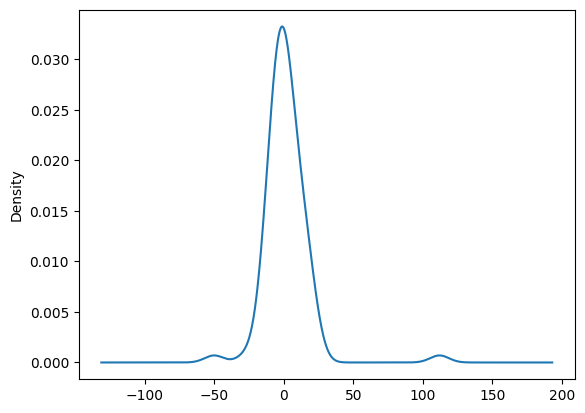

In [73]:
results.resid.plot(kind='kde')

In [74]:
test_data['Predicted_ARIMA']=pred

<ipython-input-74-69896c9f46c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<Axes: xlabel='Month'>

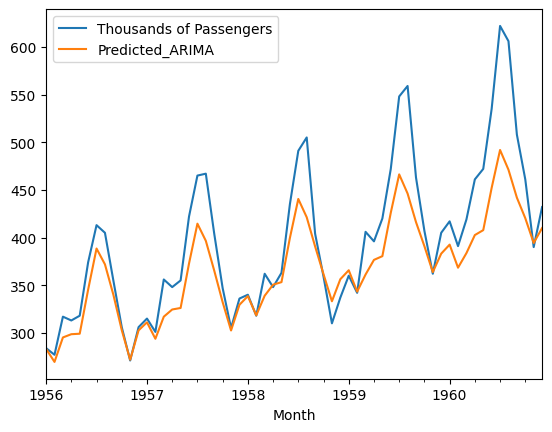

In [75]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

In [76]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [78]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [79]:
model_SARIMA_fit=model_SARIMA.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [83]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Fri, 21 Apr 2023   AIC                            548.481
Time:                                     13:21:18   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5981      0.938      0.638      0.524      -1.239       2.436
ar.L2          0.8311      0.232      3.582      0.000       0.376       1.286
ar.L3         -0.4523      0.894     -0.506      0.613      -2.204       1.299
ma.L1          0.1839      1.163      0.158      0.874      -2.095       2.463
ma.L2         -0.5340      1.260     -0.424      0.672      -3.004       1.936
ma.L3         -0.0987      0.384     -0.257      0.797      -0.851       0.653
ma.L4         -0.1273      0.337     -0.378      0.705      -0.787       0.533
ma.L5          0.2471      0.356      0.694      0.488      -0.451       0.945
sigma2        87.7331     80.954      1.084      0.278     -70.934     246.400
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [84]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))

In [87]:
a = model_SARIMA_fit.get_prediction()

In [88]:
a

<Axes: xlabel='Month'>

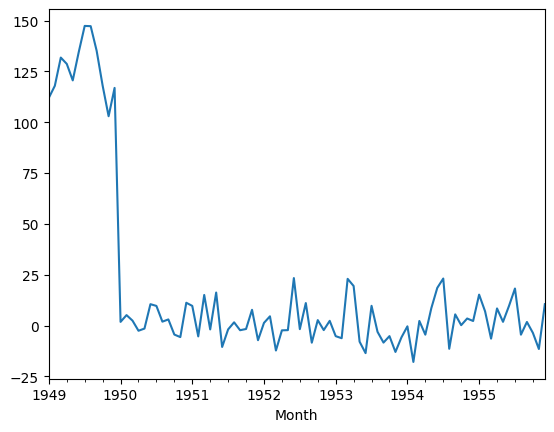

In [89]:
model_SARIMA_fit.resid.plot()

In [90]:
test_data['Predicted_SARIMA']=pred_Sarima


<ipython-input-90-5be0f969ecf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


<Axes: xlabel='Month'>

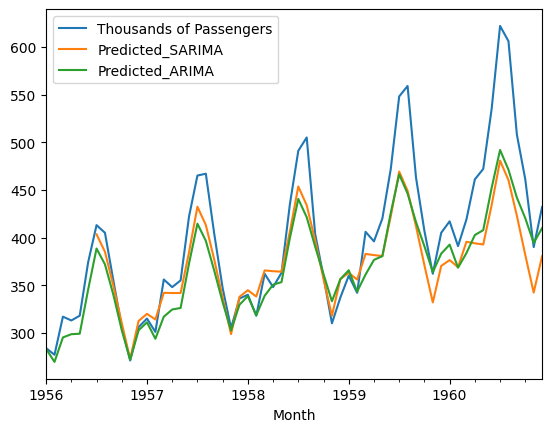

In [91]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()